<a href="https://colab.research.google.com/github/Gui-mp8/MiniProjeto_Roof.Imoveis/blob/main/MiniProjetoDNC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import plotly.express as px
import scipy.stats as stats

In [ ]:
#Importando os dados
df = pd.read_csv(r'/content/kc_house_data.csv')

In [ ]:
#Checando os dados
df.shape
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Renomeando as colunas
df.rename(columns = {'date':'DataVenda', 
                     'price':'PrecoVenda', 
                     'bedrooms':'Nquartos', 
                     'bathrooms':'Nbanheiros',
                     'floors':'Nandares', 
                     'waterfront':'Beira-mar', 
                     'view':'Grau da Vista', 
                     'condition':'Condicao', 
                     'grade':'QualidadeConstrucao', 
                     'sqft_above':'Area acima do solo', 
                     'sqft_basement':'Area abaixo do solo', 
                     'yr_built':'AnoContrucao', 
                     'yr_renovated':'AnoRestauracao', 
                     'zipcode':'CEP'}, inplace = True)

#sqft_living = Tamanho da area habitavel em ft^2
#sqft_lot = Tamanho do terreno em ft^2
#sqft_living15 = Média da área habitavel dos 15 imoveis mais proximos em ft^2
#sqft_lot15 = Média da area do terreno dos 15 imoveis mais proximos em ft^2

df

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,sqft_living,sqft_lot,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,Area acima do solo,Area abaixo do solo,AnoContrucao,AnoRestauracao,CEP,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#Checar os tipos de dados
df.dtypes

id                       int64
DataVenda               object
PrecoVenda             float64
Nquartos                 int64
Nbanheiros             float64
sqft_living              int64
sqft_lot                 int64
Nandares               float64
Beira-mar                int64
Grau da Vista            int64
Condicao                 int64
QualidadeConstrucao      int64
Area acima do solo       int64
Area abaixo do solo      int64
AnoContrucao             int64
AnoRestauracao           int64
CEP                      int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
dtype: object

In [ ]:
#Transformar ft^2 em m^2
#m^2 = ft^2/10764
def mquadrado(x):
  return x/10.763

df['sqft_living'] = df['sqft_living'].apply(mquadrado)
df['sqft_lot'] = df['sqft_lot'].apply(mquadrado)
df['sqft_living15'] = df['sqft_living15'].apply(mquadrado)
df['sqft_lot15'] = df['sqft_lot15'].apply(mquadrado)
df

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,sqft_living,sqft_lot,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,Area acima do solo,Area abaixo do solo,AnoContrucao,AnoRestauracao,CEP,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,109.634860,524.946576,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,124.500604,524.946576
1,6414100192,20141209T000000,538000.0,3,2.25,238.781009,672.860727,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,157.019418,709.746353
2,5631500400,20150225T000000,180000.0,2,1.00,71.541392,929.108984,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,252.717644,749.047663
3,2487200875,20141209T000000,604000.0,4,3.00,182.105361,464.554492,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,126.358822,464.554492
4,1954400510,20150218T000000,510000.0,3,2.00,156.090309,750.720059,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,167.239617,697.110471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,142.153675,105.082226,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,142.153675,140.202546
21609,6600060120,20150223T000000,400000.0,4,2.50,214.624175,540.091053,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,170.026944,668.958469
21610,1523300141,20140623T000000,402101.0,2,0.75,94.769116,125.429713,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,94.769116,186.472173
21611,291310100,20150116T000000,400000.0,3,2.50,148.657438,221.871225,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,131.004367,119.576326


In [ ]:
df.rename(columns = {'sqft_living':'AreaCasa', 'sqft_lot':'AreaTerreno', 'sqft_living15':'Media_AC15','sqft_lot15':'Media_AT15' }, inplace = True)
df.head()

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,AreaCasa,AreaTerreno,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,Area acima do solo,Area abaixo do solo,AnoContrucao,AnoRestauracao,CEP,lat,long,Media_AC15,Media_AT15
0,7129300520,20141013T000000,221900.0,3,1.00,109.634860,524.946576,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,124.500604,524.946576
1,6414100192,20141209T000000,538000.0,3,2.25,238.781009,672.860727,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,157.019418,709.746353
2,5631500400,20150225T000000,180000.0,2,1.00,71.541392,929.108984,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,252.717644,749.047663
3,2487200875,20141209T000000,604000.0,4,3.00,182.105361,464.554492,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,126.358822,464.554492
4,1954400510,20150218T000000,510000.0,3,2.00,156.090309,750.720059,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,167.239617,697.110471


In [ ]:
#Checar se existe nulo
df.isna().sum()

id                     0
DataVenda              0
PrecoVenda             0
Nquartos               0
Nbanheiros             0
AreaCasa               0
AreaTerreno            0
Nandares               0
Beira-mar              0
Grau da Vista          0
Condicao               0
QualidadeConstrucao    0
Area acima do solo     0
Area abaixo do solo    0
AnoContrucao           0
AnoRestauracao         0
CEP                    0
lat                    0
long                   0
Media_AC15             0
Media_AT15             0
dtype: int64

In [ ]:
#Alinhando os dados de acordo com o maior preço
df.sort_values(['PrecoVenda'], ascending=False, inplace=True)
df.describe()


,id,PrecoVenda,Nquartos,Nbanheiros,AreaCasa,AreaTerreno,Nandares,Beira-mar,Grau da Vista,Condicao,QualidadeConstrucao,Area acima do solo,Area abaixo do solo,AnoContrucao,AnoRestauracao,CEP,lat,long,Media_AC15,Media_AT15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,193.245353,1403.601929,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,184.572377,1186.328686
std,2.876566e+09,3.671272e+05,0.930062,0.770163,85.333169,3848.416939,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,63.680322,2536.855861
min,1.000102e+06,7.500000e+04,0.000000,0.000000,26.944161,48.313667,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,37.071448,60.484995
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,132.583852,468.270928,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,138.437239,473.845582
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,177.459816,707.795224,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,170.956053,707.981046
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,236.922791,993.031683,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,219.269720,936.820589
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1258.013565,153429.248351,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,576.976679,80943.974728


In [ ]:
#Checar se existe nulo
df.isna().sum()

id                     0
DataVenda              0
PrecoVenda             0
Nquartos               0
Nbanheiros             0
AreaCasa               0
AreaTerreno            0
Nandares               0
Beira-mar              0
Grau da Vista          0
Condicao               0
QualidadeConstrucao    0
Area acima do solo     0
Area abaixo do solo    0
AnoContrucao           0
AnoRestauracao         0
CEP                    0
lat                    0
long                   0
Media_AC15             0
Media_AT15             0
dtype: int64

In [ ]:
venda = df[['PrecoVenda', 'QualidadeConstrucao', 'Condicao']]

In [ ]:
#Convertendo os dados da coluna 'Data da Venda' em data
#limpando os dados da coluna
df['DataVenda']= pd.to_datetime(df['DataVenda'])
df

,id,DataVenda,PrecoVenda,Nquartos,Nbanheiros,AreaCasa,AreaTerreno,Nandares,Beira-mar,Grau da Vista,...,QualidadeConstrucao,Area acima do solo,Area abaixo do solo,AnoContrucao,AnoRestauracao,CEP,lat,long,Media_AC15,Media_AT15
7252,6762700020,2014-10-13,7700000.0,6,8.00,1119.576326,2564.340797,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,366.068940,817.615906
3914,9808700762,2014-06-11,7062500.0,5,4.50,932.825420,3467.899285,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,365.139831,2364.489455
9254,9208900037,2014-09-19,6885000.0,6,7.75,918.888786,2914.986528,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,421.815479,3970.082691
4411,2470100110,2014-08-04,5570000.0,5,5.75,854.780266,3258.292298,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,330.762798,2261.915823
1448,8907500070,2015-04-13,5350000.0,5,5.00,743.287188,2228.467899,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,427.390133,2020.812041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,2014-11-05,82000.0,3,1.00,79.903373,968.689027,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,105.918424,1045.247608
16198,3028200080,2015-03-24,81000.0,2,1.00,67.824956,926.786212,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,79.903373,836.198086
465,8658300340,2014-05-23,80000.0,1,0.75,39.951686,469.200037,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,111.493078,696.831738
15293,40000362,2014-05-06,78000.0,2,1.00,72.470501,1518.535724,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,157.948527,965.065502


In [ ]:
# análise de correlação
# Saber quais variáveis que mais impactam no valor da venda do imóvel
correlation = df.corr()

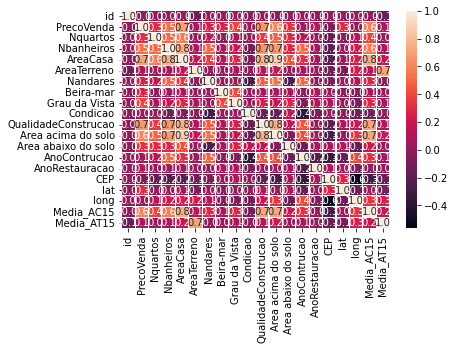

In [ ]:
# plot da matriz de correlação
plt.figure(figsize = (15,8))
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.10)
plot

In [ ]:
#Checar se existe nulo
df.isna().sum()

id                     0
DataVenda              0
PrecoVenda             0
Nquartos               0
Nbanheiros             0
AreaCasa               0
AreaTerreno            0
Nandares               0
Beira-mar              0
Grau da Vista          0
Condicao               0
QualidadeConstrucao    0
Area acima do solo     0
Area abaixo do solo    0
AnoContrucao           0
AnoRestauracao         0
CEP                    0
lat                    0
long                   0
Media_AC15             0
Media_AT15             0
dtype: int64

In [ ]:
statsvalvenda = venda.describe()
statsvalvenda

,PrecoVenda,QualidadeConstrucao,Condicao
count,2.161300e+04,21613.000000,21613.000000
mean,5.400881e+05,7.656873,3.409430
std,3.671272e+05,1.175459,0.650743
min,7.500000e+04,1.000000,1.000000
25%,3.219500e+05,7.000000,3.000000
50%,4.500000e+05,7.000000,3.000000
75%,6.450000e+05,8.000000,4.000000
max,7.700000e+06,13.000000,5.000000


In [ ]:
# A partir da correlação descobrimos quais são os principais fatores que influenciam no preço que são: 
# Nbanheiros (0,5), AreaCasa(0,7), QualidadeConstrucao (0,7), Area acima do solo(0,6), Media_AC15(0,6) -> valordevenda
# Implementando Regressão Linear com Python
# importar os pacotes necessários
# Como é a estrutura estatística dos dados que mais correlacionam com o valor do imóvel?? 

varimportante = df[['PrecoVenda', 'Nbanheiros', 'AreaCasa', 'QualidadeConstrucao', 'Area acima do solo','Media_AC15']]
varimportante.describe().astype(int)


,PrecoVenda,Nbanheiros,AreaCasa,QualidadeConstrucao,Area acima do solo,Media_AC15
count,21613,21613,21613,21613,21613,21613
mean,540088,2,193,7,1788,184
std,367127,0,85,1,828,63
min,75000,0,26,1,290,37
25%,321950,1,132,7,1190,138
50%,450000,2,177,7,1560,170
75%,645000,2,236,8,2210,219
max,7700000,8,1258,13,9410,576


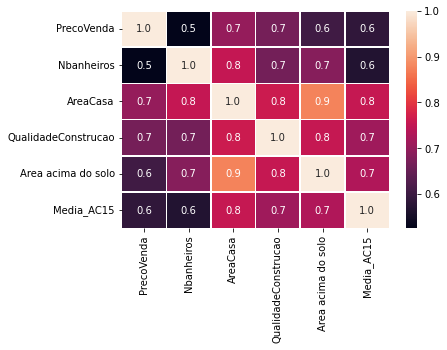

In [ ]:
#Dentre os dados que mais se correlacionam, quais mais se correlacionam entre si?
# análise de correlação
correlation2 = varimportante.corr()

# plot da matriz de correlação

plot2 = sn.heatmap(correlation2, annot = True, fmt=".1f", linewidths=.6)
plot2